In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2, fftshift, fftfreq
from ipywidgets import interact, FloatSlider, IntSlider

%matplotlib widget

# Grating Example

## Infinite Grating

In [2]:
def rect(t):
    '''
        Returns rect(t), the rectangle function.
    '''
    f = []
    for i in t:
        if i<-1/2 or i>1/2:
            f.append(0)
        elif i==-1/2 or i==1/2:
            f.append(1/2)
        else:
            f.append(1)
    f = np.array(f)
    return f

def dirac(t):
    '''
        Returns the dirac function
    '''
    f = np.zeros(t.shape)
    f[np.argmin(t**2)] = 1
    return f

def train(t, h):
    f = np.zeros(t.shape)
    for n in range(int(min(t/h)), int(max(t/h)+1)):
        f+=dirac(y-n*h)
    return f

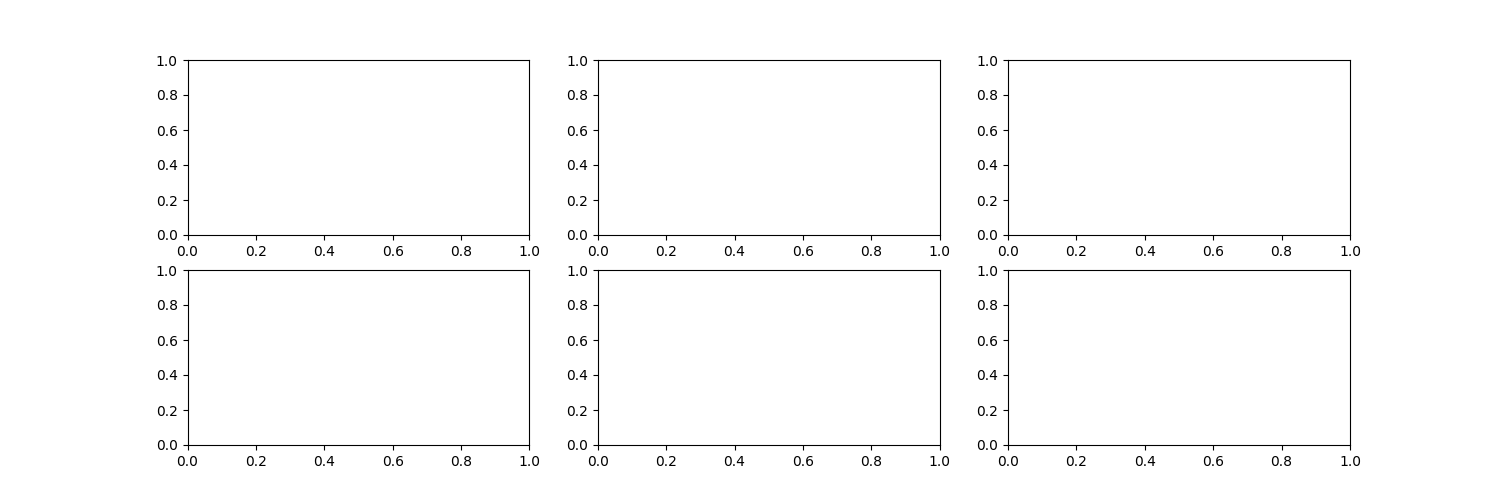

interactive(children=(FloatSlider(value=0.01, description='h', max=0.5, min=0.01, step=0.01), FloatSlider(valu…

<function __main__.plot(h, b, pad_size)>

In [8]:
n_sampling = int(1e3)
T_sampling = 1/n_sampling
y = np.linspace(-1, 1, n_sampling+1)
y = np.round(y, 4)

_, axs = plt.subplots(2,3,figsize=[15, 5])
plt.show()

def plot(h, b, pad_size):
    n_sampling = int(1e3)
    T_sampling = 1/n_sampling
    
    y = np.linspace(-1, 1, n_sampling+1)
    y = np.round(y, 4)
    g1 = rect(y/b)
    g2 = train(y, h)
    
    # adding padding
    if pad_size>0:
        g1 = np.pad(g1, pad_size)
        g2 = np.pad(g2, pad_size)
        newsize = len(g1)
        newmin = -newsize*T_sampling/2
        newmax = newsize*T_sampling/2
        print(newmin, newmax, newsize)
        y = np.linspace(newmin, newmax, newsize)
        y = np.round(y, 4)
    
    g = np.convolve(g1, g2, mode='same')

    G1 = fftshift(fft(g1))
    G2 = fftshift(fft(g2))
    G = fftshift(fft(g))
    v = fftshift(fftfreq(len(y), T_sampling))
    G1 = G1/G1.max()
    G2 = G2/G2.max()
    G = G/G.max()

    for ax in axs.flatten():
        ax.clear()
        
    axs[0,0].plot(y, g1)
    axs[0,1].plot(y, g2)
    axs[0,2].plot(y, g)
    axs[1,0].plot(v, np.abs(G1))
    axs[1,1].plot(v, np.abs(G2))
    axs[1,2].plot(v, np.abs(G))
    axs[1,2].plot(v, np.abs(G1))
    
    axs[0,0].set_title(r'$g_1(y)$')
    axs[0,1].set_title(r'$g_2(y)$')
    axs[0,2].set_title(r'$g(y) = g_1\circledast g_2 (y)$')
    axs[1,0].set_title(r'$\hat{g}_1(\nu)$')
    axs[1,1].set_title(r'$\hat{g}_2(\nu)$')
    axs[1,2].set_title(r'$\hat{g}(\nu) = \hat{g}_1\cdot\hat{g}_2(\nu)$')

    plt.tight_layout()
    
pad_slider = IntSlider(min=0, max=int(1e4), value=0)
h_slider = FloatSlider(min=0.01, max=0.5, step=0.01)
b_slider = FloatSlider(min=0.001, max=0.2, step=0.001)
interact(plot, h=h_slider, b=b_slider, pad_size=pad_slider)